# Chennai House Price Prediction
## Problem Statement

Real estate transactions are quite opaque sometimes and it may be difficult for a newbie to know the fair price of any given home. Thus, multiple real estate websites have the functionality to predict the prices of houses given different features regarding it. Such forecasting models will help buyers to identify a fair price for the home and also give insights to sellers as to how to build homes that fetch them more money. Chennai house sale price data is shared here and the participants are expected to build a sale price prediction model that will aid the customers to find a fair price for their homes and also help the sellers understand what factors are fetching more money for the houses?

## Minimum Requirements
It is not sufficient to just fit a model - the model must be analysed to find the important factors that contribute towards the price. Also, it will be better to give a forecast range (range of permissible values) rather than a single estimate as it will help the customers to negotiate.

## Objective
* The model must be analysed to find the important factors that contribute towards the sales price
* It will be better to give a forecast range(range of permissible values) rathar than a single estimate as it will help the customers to negotiate.

## Data Description
## Features

* PRT_ID -- Property ID
* INT_SQFT -- The interior sq.Ft of the property
* DIST_MAINROAD -- The distance of the property to the main road
* N_BEDROOM -- The number of Bed rooms
* N_BATHROOM -- The number of bathroom
* N_ROOM --Toal Number of Rooms
* QS_ROOMS--The quality Score assigned for rooms based on buyer reviews
* QS_BATHROOM -- The quality score assigned for bathroom on buyer reviews
* QS_BEDROOM -- The quality score assigned for bedroom on buyer reviews
* QS_OVERALL -- The Overall quality score assigned for the property
* SALE_COND -- The Sale condition
   * Normal
   * Abnormal
   * Adjland
   * Family
   * Partial
* BUILDTYPE -- The type of buliding
   * House
   * Commercial
   * Others
* UTILITY_AVAIL
   * Allpub: All public utilites
   * NoSewr:Electricity,Gas, and Water
   * NoSewa:Electricty and gas only
   * ELO: Elecctricty only
* STREET
   * Gravel
   * Paved
   * No Access
* MZZONE
   * A: Agriculture
   * C: Commercial
   * I: Industrial
   * RH: Residential High Density
   * RL: Residential Low Density
   * RM: Residential Medium Density

* REG_FEE -- Resgistration fees for the property
* COMMIS -- The Commission paid to the agen
* SALES_PRICE-- The total sale price of the property

**Importing all necessary Libraries**

In [229]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
%matplotlib inline

In [230]:
#display all the columns of the dataframe
pd.pandas.set_option('display.max_columns',None)

In [231]:
import warnings                      
warnings.filterwarnings('ignore')

In [232]:
df=pd.read_csv("Chennai houseing sale.csv")
df.head()

PRT_ID        AREA  INT_SQFT   DATE_SALE  DIST_MAINROAD  N_BEDROOM  \
0  P03210  Karapakkam      1004  04-05-2011            131        1.0   
1  P09411  Anna Nagar      1986  19-12-2006             26        2.0   
2  P01812       Adyar       909  04-02-2012             70        1.0   
3  P05346   Velachery      1855  13-03-2010             14        3.0   
4  P06210  Karapakkam      1226  05-10-2009             84        1.0   

   N_BATHROOM  N_ROOM SALE_COND PARK_FACIL  DATE_BUILD   BUILDTYPE  \
0         1.0       3  AbNormal        Yes  15-05-1967  Commercial   
1         1.0       5  AbNormal         No  22-12-1995  Commercial   
2         1.0       3  AbNormal        Yes  09-02-1992  Commercial   
3         2.0       5    Family         No  18-03-1988      Others   
4         1.0       3  AbNormal        Yes  13-10-1979      Others   

  UTILITY_AVAIL  STREET MZZONE  QS_ROOMS  QS_BATHROOM  QS_BEDROOM  QS_OVERALL  \
0        AllPub   Paved      A       4.0          3.9         4.9       4.330   
1        AllPub  Gravel     RH       4.9          4.2         2.5       3.765   
2           ELO  Gravel     RL       4.1          3.8         2.2       3.090   
3       NoSewr    Paved      I       4.7          3.9         3.6       4.010   
4        AllPub  Gravel      C       3.0          2.5         4.1       3.290   

   REG_FEE  COMMIS  SALES_PRICE  
0   380000  144400      7600000  
1   760122  304049     21717770  
2   421094   92114     13159200  
3   356321   77042      9630290  
4   237000   74063      7406250

In [233]:
df.shape


(7109, 22)

In [234]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7109 entries, 0 to 7108
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   PRT_ID         7109 non-null   object 
 1   AREA           7109 non-null   object 
 2   INT_SQFT       7109 non-null   int64  
 3   DATE_SALE      7109 non-null   object 
 4   DIST_MAINROAD  7109 non-null   int64  
 5   N_BEDROOM      7108 non-null   float64
 6   N_BATHROOM     7104 non-null   float64
 7   N_ROOM         7109 non-null   int64  
 8   SALE_COND      7109 non-null   object 
 9   PARK_FACIL     7109 non-null   object 
 10  DATE_BUILD     7109 non-null   object 
 11  BUILDTYPE      7109 non-null   object 
 12  UTILITY_AVAIL  7109 non-null   object 
 13  STREET         7109 non-null   object 
 14  MZZONE         7109 non-null   object 
 15  QS_ROOMS       7109 non-null   float64
 16  QS_BATHROOM    7109 non-null   float64
 17  QS_BEDROOM     7109 non-null   float64
 18  QS_OVERA

In [235]:
df.describe()

INT_SQFT  DIST_MAINROAD    N_BEDROOM   N_BATHROOM       N_ROOM  \
count  7109.000000    7109.000000  7108.000000  7104.000000  7109.000000   
mean   1382.073006      99.603179     1.637029     1.213260     3.688704   
std     457.410902      57.403110     0.802902     0.409639     1.019099   
min     500.000000       0.000000     1.000000     1.000000     2.000000   
25%     993.000000      50.000000     1.000000     1.000000     3.000000   
50%    1373.000000      99.000000     1.000000     1.000000     4.000000   
75%    1744.000000     148.000000     2.000000     1.000000     4.000000   
max    2500.000000     200.000000     4.000000     2.000000     6.000000   

          QS_ROOMS  QS_BATHROOM   QS_BEDROOM   QS_OVERALL        REG_FEE  \
count  7109.000000  7109.000000  7109.000000  7061.000000    7109.000000   
mean      3.517471     3.507244     3.485300     3.503254  376938.330708   
std       0.891972     0.897834     0.887266     0.527223  143070.662010   
min       2.000000     2.000000     2.000000     2.000000   71177.000000   
25%       2.700000     2.700000     2.700000     3.130000  272406.000000   
50%       3.500000     3.500000     3.500000     3.500000  349486.000000   
75%       4.300000     4.300000     4.300000     3.890000  451562.000000   
max       5.000000     5.000000     5.000000     4.970000  983922.000000   

              COMMIS   SALES_PRICE  
count    7109.000000  7.109000e+03  
mean   141005.726544  1.089491e+07  
std     78768.093718  3.768603e+06  
min      5055.000000  2.156875e+06  
25%     84219.000000  8.272100e+06  
50%    127628.000000  1.033505e+07  
75%    184506.000000  1.299390e+07  
max    495405.000000  2.366734e+07

In [236]:
df.isnull().sum()

PRT_ID            0
AREA              0
INT_SQFT          0
DATE_SALE         0
DIST_MAINROAD     0
N_BEDROOM         1
N_BATHROOM        5
N_ROOM            0
SALE_COND         0
PARK_FACIL        0
DATE_BUILD        0
BUILDTYPE         0
UTILITY_AVAIL     0
STREET            0
MZZONE            0
QS_ROOMS          0
QS_BATHROOM       0
QS_BEDROOM        0
QS_OVERALL       48
REG_FEE           0
COMMIS            0
SALES_PRICE       0
dtype: int64

**INITIAL OBSERVATIONS ON DATASET:**
1. TOTAL NO OF ROWS AND COLUMNS : 7109, 22
2. THREE COLUMNS HAVE NAN VALUES 'QS_OVERALL', N BATHROOM and N BEDROOM
3. FOUR COLUMNS ARE NOT REQUIRED FOR CREATING ML MODEL.ONE IS ID COLUMNS AND OTHER THREE COLUMNS ARE NOT REQUIRED
4. FEW COLUMNS ARE NOT IN THE RIGHT DATATYPE 

##**Data Cleaning**

**Looking for Null Values in Dataset**

In [237]:
df.isnull().sum()

PRT_ID            0
AREA              0
INT_SQFT          0
DATE_SALE         0
DIST_MAINROAD     0
N_BEDROOM         1
N_BATHROOM        5
N_ROOM            0
SALE_COND         0
PARK_FACIL        0
DATE_BUILD        0
BUILDTYPE         0
UTILITY_AVAIL     0
STREET            0
MZZONE            0
QS_ROOMS          0
QS_BATHROOM       0
QS_BEDROOM        0
QS_OVERALL       48
REG_FEE           0
COMMIS            0
SALES_PRICE       0
dtype: int64

**In this dataset, N BATHROOM has 5 and N BEDROOM has 1 Nan values, respectively, and QS OVERALL has a total of 48 Nan**

In [238]:
# Either we discard it or we fill a value with mode.
df["N_BEDROOM"].fillna(df["N_BEDROOM"].mode()[0], inplace=True)

In [239]:
df.N_BATHROOM.dtype
df.N_BEDROOM.dtype

dtype('float64')

In [240]:
# Similarly for N_Bathroom
df["N_BATHROOM"].fillna(df["N_BATHROOM"].mode()[0], inplace=True)

**Changing the DataType**

In [241]:
# Changing DATA TYPE to 'int'
df["N_BEDROOM"]=df["N_BEDROOM"].astype("int")
df["N_BATHROOM"]=df["N_BATHROOM"].astype("int")

In [242]:
#dropping the unneccesary columns
df.drop(columns=['PRT_ID','QS_ROOMS',
       'QS_BATHROOM', 'QS_BEDROOM', 'QS_OVERALL'],inplace=True)

In [243]:
df.shape

(7109, 17)

In [244]:
#Now there is  no null values present
df.isnull().sum()

AREA             0
INT_SQFT         0
DATE_SALE        0
DIST_MAINROAD    0
N_BEDROOM        0
N_BATHROOM       0
N_ROOM           0
SALE_COND        0
PARK_FACIL       0
DATE_BUILD       0
BUILDTYPE        0
UTILITY_AVAIL    0
STREET           0
MZZONE           0
REG_FEE          0
COMMIS           0
SALES_PRICE      0
dtype: int64

In [245]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7109 entries, 0 to 7108
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   AREA           7109 non-null   object
 1   INT_SQFT       7109 non-null   int64 
 2   DATE_SALE      7109 non-null   object
 3   DIST_MAINROAD  7109 non-null   int64 
 4   N_BEDROOM      7109 non-null   int32 
 5   N_BATHROOM     7109 non-null   int32 
 6   N_ROOM         7109 non-null   int64 
 7   SALE_COND      7109 non-null   object
 8   PARK_FACIL     7109 non-null   object
 9   DATE_BUILD     7109 non-null   object
 10  BUILDTYPE      7109 non-null   object
 11  UTILITY_AVAIL  7109 non-null   object
 12  STREET         7109 non-null   object
 13  MZZONE         7109 non-null   object
 14  REG_FEE        7109 non-null   int64 
 15  COMMIS         7109 non-null   int64 
 16  SALES_PRICE    7109 non-null   int64 
dtypes: int32(2), int64(6), object(9)
memory usage: 888.8+ KB


**Cleaning the Data by Column Wise**

**1.AREA**

In [246]:
df.AREA.unique()

array(['Karapakkam', 'Anna Nagar', 'Adyar', 'Velachery', 'Chrompet',
       'KK Nagar', 'TNagar', 'T Nagar', 'Chrompt', 'Chrmpet', 'Karapakam',
       'Ana Nagar', 'Chormpet', 'Adyr', 'Velchery', 'Ann Nagar',
       'KKNagar'], dtype=object)

There are more duplicates in this column as a result of spelling errors. Use the REPLACE function to make the necessary corrections.

In [247]:
df=df.drop_duplicates()

In [248]:
#replacing duplicates
replacing_duplicates={'Chrompt':'Chrompet','Chrmpet':'Chrompet','Chormpet':'Chrompet','Karapakam':'Karapakkam','Adyr':'Adyar','Ana Nagar':'Anna Nagar','Ann Nagar':'Anna Nagar',
          'Velchery':'Velachery','KKNagar':'KK Nagar','TNagar':'T Nagar'}
df['AREA']=df['AREA'].replace(replacing_duplicates)

In [249]:
df.AREA.unique()

array(['Karapakkam', 'Anna Nagar', 'Adyar', 'Velachery', 'Chrompet',
       'KK Nagar', 'T Nagar'], dtype=object)

In [250]:
df.AREA.value_counts()

AREA
Chrompet      1702
Karapakkam    1366
KK Nagar       997
Velachery      981
Anna Nagar     788
Adyar          774
T Nagar        501
Name: count, dtype: int64

**2.N_BEDROOM**

In [251]:
df.N_BEDROOM.value_counts()

N_BEDROOM
1    3796
2    2352
3     707
4     254
Name: count, dtype: int64

**3. N_BATHROOM**

In [252]:
df.N_BATHROOM.value_counts()

N_BATHROOM
1    5594
2    1515
Name: count, dtype: int64

**4. SALE_COND Column**

In [253]:
df['SALE_COND'].unique()

array(['AbNormal', 'Family', 'Partial', 'AdjLand', 'Normal Sale',
       'Ab Normal', 'Partiall', 'Adj Land', 'PartiaLl'], dtype=object)

In [254]:
#replacing duplicates
df=df.replace(to_replace=['Ab Normal'],value='AbNormal')
df=df.replace(to_replace=['Partiall','PartiaLl'],value='Partial')
df=df.replace(to_replace=['AdjLand'],value='Adj Land')

In [255]:
df.SALE_COND.unique()

array(['AbNormal', 'Family', 'Partial', 'Adj Land', 'Normal Sale'],
      dtype=object)

In [256]:
df.SALE_COND.value_counts()

SALE_COND
Adj Land       1439
Partial        1433
Normal Sale    1423
AbNormal       1411
Family         1403
Name: count, dtype: int64

**5. PARK FACIL**

In [257]:
df['PARK_FACIL'].unique()

array(['Yes', 'No', 'Noo'], dtype=object)

In [258]:
df=df.replace(to_replace=['Noo'],value='No')


In [259]:
df['PARK_FACIL'].unique()

array(['Yes', 'No'], dtype=object)

In [260]:
df.PARK_FACIL.value_counts()

PARK_FACIL
Yes    3587
No     3522
Name: count, dtype: int64

**6.BUILDTYPE**

In [261]:
#finding the unique elements of the column
df['BUILDTYPE'].unique()

array(['Commercial', 'Others', 'Other', 'House', 'Comercial'],
      dtype=object)

In [262]:
map={'Comercial':'Commercial','Other':'Others'}
df['BUILDTYPE']=df['BUILDTYPE'].replace(map)

In [263]:
df['BUILDTYPE'].unique()

array(['Commercial', 'Others', 'House'], dtype=object)

In [264]:
df.BUILDTYPE.value_counts()

BUILDTYPE
House         2444
Others        2336
Commercial    2329
Name: count, dtype: int64

**7.UTILITY AVAIL**

In [265]:
df['UTILITY_AVAIL'].unique()

array(['AllPub', 'ELO', 'NoSewr ', 'NoSeWa', 'All Pub'], dtype=object)

In [266]:
df["UTILITY_AVAIL"] = df["UTILITY_AVAIL"].replace({"All Pub": "AllPub", "NoSewr " : "NoSewr"})

In [267]:
df['UTILITY_AVAIL'].unique()

array(['AllPub', 'ELO', 'NoSewr', 'NoSeWa'], dtype=object)

In [268]:
df.UTILITY_AVAIL.value_counts()

UTILITY_AVAIL
AllPub    1887
NoSeWa    1871
NoSewr    1829
ELO       1522
Name: count, dtype: int64

**8.STREET**

In [269]:
#finding the unique elements of the column
df['STREET'].unique()

array(['Paved', 'Gravel', 'No Access', 'Pavd', 'NoAccess'], dtype=object)

In [270]:
#replacing duplicates
map2={'Pavd':'Paved','NoAccess':'No Access'}
df['STREET']=df['STREET'].replace(map2)

In [271]:
df['STREET'].unique()

array(['Paved', 'Gravel', 'No Access'], dtype=object)

In [272]:
df.STREET.value_counts()

STREET
Paved        2572
Gravel       2520
No Access    2017
Name: count, dtype: int64

**9.MZZONE**

In [273]:
#finding the unique elements of the column
df['MZZONE'].unique()

array(['A', 'RH', 'RL', 'I', 'C', 'RM'], dtype=object)

In [274]:
df.MZZONE.value_counts()

MZZONE
RL    1858
RH    1822
RM    1817
C      550
A      537
I      525
Name: count, dtype: int64

**10. REG_FEE & 11. COMMIS Column**

These columns, REG FEE & COMMIS, are unnecessary because they have no impact on sales beforehand. So i'm dropping this column

In [275]:
df= df.drop(["REG_FEE", "COMMIS"], axis=1)

In [276]:
df.columns

Index(['AREA', 'INT_SQFT', 'DATE_SALE', 'DIST_MAINROAD', 'N_BEDROOM',
       'N_BATHROOM', 'N_ROOM', 'SALE_COND', 'PARK_FACIL', 'DATE_BUILD',
       'BUILDTYPE', 'UTILITY_AVAIL', 'STREET', 'MZZONE', 'SALES_PRICE'],
      dtype='object')

In [277]:
df.DATE_SALE.dtype
df.DATE_BUILD.dtype

dtype('O')

In [278]:
df.N_ROOM.value_counts()

N_ROOM
4    2563
3    2125
5    1246
2     921
6     254
Name: count, dtype: int64

In [279]:
#converting these two columns' object datatypes to date/time formats
df['DATE_SALE'] = pd.to_datetime(df['DATE_SALE'], format='%d-%m-%Y')
df['DATE_BUILD'] = pd.to_datetime(df['DATE_BUILD'], format='%d-%m-%Y')


In [280]:
df["DATE_SALE"][0]

Timestamp('2011-05-04 00:00:00')

In [281]:
df.head()

AREA  INT_SQFT  DATE_SALE  DIST_MAINROAD  N_BEDROOM  N_BATHROOM  \
0  Karapakkam      1004 2011-05-04            131          1           1   
1  Anna Nagar      1986 2006-12-19             26          2           1   
2       Adyar       909 2012-02-04             70          1           1   
3   Velachery      1855 2010-03-13             14          3           2   
4  Karapakkam      1226 2009-10-05             84          1           1   

   N_ROOM SALE_COND PARK_FACIL DATE_BUILD   BUILDTYPE UTILITY_AVAIL  STREET  \
0       3  AbNormal        Yes 1967-05-15  Commercial        AllPub   Paved   
1       5  AbNormal         No 1995-12-22  Commercial        AllPub  Gravel   
2       3  AbNormal        Yes 1992-02-09  Commercial           ELO  Gravel   
3       5    Family         No 1988-03-18      Others        NoSewr   Paved   
4       3  AbNormal        Yes 1979-10-13      Others        AllPub  Gravel   

  MZZONE  SALES_PRICE  
0      A      7600000  
1     RH     21717770  
2     RL     13159200  
3      I      9630290  
4      C      7406250

In [282]:
df.isnull().sum()

AREA             0
INT_SQFT         0
DATE_SALE        0
DIST_MAINROAD    0
N_BEDROOM        0
N_BATHROOM       0
N_ROOM           0
SALE_COND        0
PARK_FACIL       0
DATE_BUILD       0
BUILDTYPE        0
UTILITY_AVAIL    0
STREET           0
MZZONE           0
SALES_PRICE      0
dtype: int64

In [283]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7109 entries, 0 to 7108
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   AREA           7109 non-null   object        
 1   INT_SQFT       7109 non-null   int64         
 2   DATE_SALE      7109 non-null   datetime64[ns]
 3   DIST_MAINROAD  7109 non-null   int64         
 4   N_BEDROOM      7109 non-null   int32         
 5   N_BATHROOM     7109 non-null   int32         
 6   N_ROOM         7109 non-null   int64         
 7   SALE_COND      7109 non-null   object        
 8   PARK_FACIL     7109 non-null   object        
 9   DATE_BUILD     7109 non-null   datetime64[ns]
 10  BUILDTYPE      7109 non-null   object        
 11  UTILITY_AVAIL  7109 non-null   object        
 12  STREET         7109 non-null   object        
 13  MZZONE         7109 non-null   object        
 14  SALES_PRICE    7109 non-null   int64         
dtypes: datetime64[ns](2),

**Our Data is now clean. There are no nan values or unnecessary columns**

#**FEATURE ENGINEERING**

We can determine the age of a house using these two columns DATE_SALE & DATE_BUILD. So, I'm creating a new column called "AGE OF BUILDING."

In [284]:
# Calculate the age of the building in years
df['AGE_OF_BUILDING'] = (df['DATE_SALE'] - df['DATE_BUILD']).dt.days / 365.25

# Display the DataFrame to confirm
df.head()



AREA  INT_SQFT  DATE_SALE  DIST_MAINROAD  N_BEDROOM  N_BATHROOM  \
0  Karapakkam      1004 2011-05-04            131          1           1   
1  Anna Nagar      1986 2006-12-19             26          2           1   
2       Adyar       909 2012-02-04             70          1           1   
3   Velachery      1855 2010-03-13             14          3           2   
4  Karapakkam      1226 2009-10-05             84          1           1   

   N_ROOM SALE_COND PARK_FACIL DATE_BUILD   BUILDTYPE UTILITY_AVAIL  STREET  \
0       3  AbNormal        Yes 1967-05-15  Commercial        AllPub   Paved   
1       5  AbNormal         No 1995-12-22  Commercial        AllPub  Gravel   
2       3  AbNormal        Yes 1992-02-09  Commercial           ELO  Gravel   
3       5    Family         No 1988-03-18      Others        NoSewr   Paved   
4       3  AbNormal        Yes 1979-10-13      Others        AllPub  Gravel   

  MZZONE  SALES_PRICE  AGE_OF_BUILDING  
0      A      7600000        43.969884  
1     RH     21717770        10.992471  
2     RL     13159200        19.986311  
3      I      9630290        21.984942  
4      C      7406250        29.979466

In [285]:
#Changing the datatype of the age from the float to int
df['AGE_OF_BUILDING']=df['AGE_OF_BUILDING'].astype('int')

In [286]:
df.head()

AREA  INT_SQFT  DATE_SALE  DIST_MAINROAD  N_BEDROOM  N_BATHROOM  \
0  Karapakkam      1004 2011-05-04            131          1           1   
1  Anna Nagar      1986 2006-12-19             26          2           1   
2       Adyar       909 2012-02-04             70          1           1   
3   Velachery      1855 2010-03-13             14          3           2   
4  Karapakkam      1226 2009-10-05             84          1           1   

   N_ROOM SALE_COND PARK_FACIL DATE_BUILD   BUILDTYPE UTILITY_AVAIL  STREET  \
0       3  AbNormal        Yes 1967-05-15  Commercial        AllPub   Paved   
1       5  AbNormal         No 1995-12-22  Commercial        AllPub  Gravel   
2       3  AbNormal        Yes 1992-02-09  Commercial           ELO  Gravel   
3       5    Family         No 1988-03-18      Others        NoSewr   Paved   
4       3  AbNormal        Yes 1979-10-13      Others        AllPub  Gravel   

  MZZONE  SALES_PRICE  AGE_OF_BUILDING  
0      A      7600000               43  
1     RH     21717770               10  
2     RL     13159200               19  
3      I      9630290               21  
4      C      7406250               29

We no longer require the DATE SALE and DATE BUILD columns.

In [287]:
df=df.drop(["DATE_SALE", "DATE_BUILD"], axis=1)

**Checking Outliers**

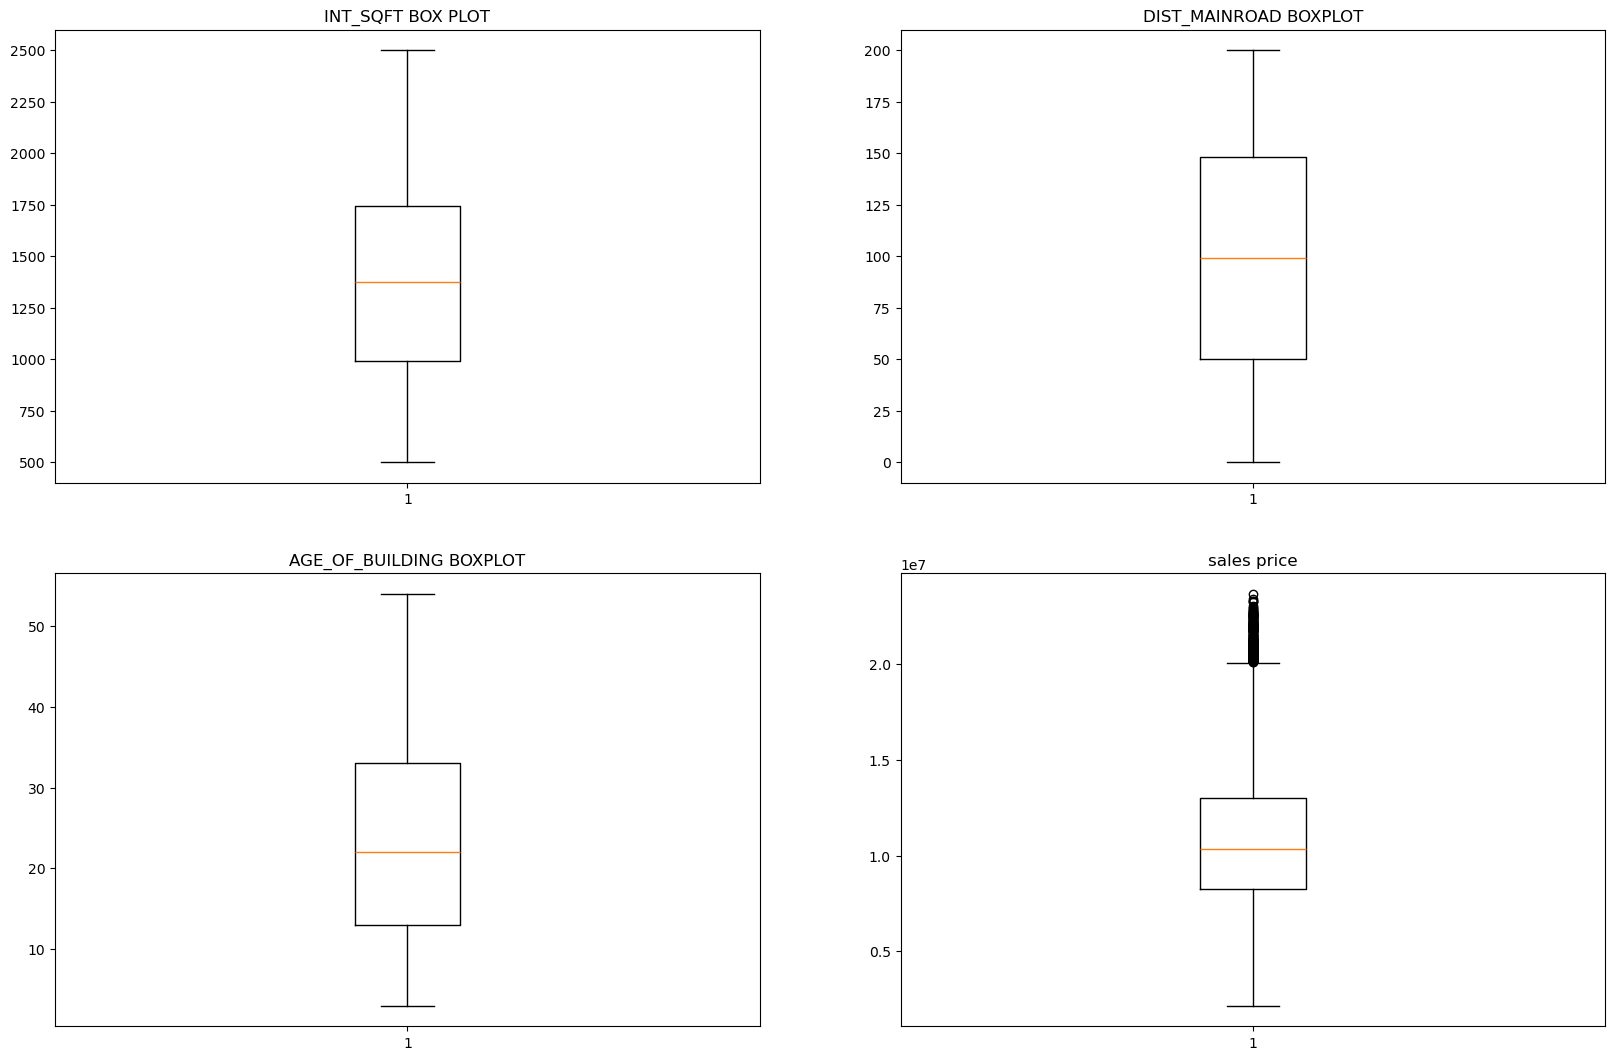

In [288]:
plt.figure(figsize=(20,20))
plt.subplot(321)
plt.boxplot(df["INT_SQFT"])
plt.title("INT_SQFT BOX PLOT")

plt.subplot(322)
plt.boxplot(df["DIST_MAINROAD"])
plt.title("DIST_MAINROAD BOXPLOT")

plt.subplot(323)
plt.boxplot(df["AGE_OF_BUILDING"])
plt.title("AGE_OF_BUILDING BOXPLOT")

plt.subplot(324)
plt.boxplot(df["SALES_PRICE"])
plt.title("sales price")
plt.show()

In [289]:
df.describe()

INT_SQFT  DIST_MAINROAD    N_BEDROOM   N_BATHROOM       N_ROOM  \
count  7109.000000    7109.000000  7109.000000  7109.000000  7109.000000   
mean   1382.073006      99.603179     1.636939     1.213110     3.688704   
std     457.410902      57.403110     0.802881     0.409534     1.019099   
min     500.000000       0.000000     1.000000     1.000000     2.000000   
25%     993.000000      50.000000     1.000000     1.000000     3.000000   
50%    1373.000000      99.000000     1.000000     1.000000     4.000000   
75%    1744.000000     148.000000     2.000000     1.000000     4.000000   
max    2500.000000     200.000000     4.000000     2.000000     6.000000   

        SALES_PRICE  AGE_OF_BUILDING  
count  7.109000e+03      7109.000000  
mean   1.089491e+07        23.291743  
std    3.768603e+06        12.342006  
min    2.156875e+06         3.000000  
25%    8.272100e+06        13.000000  
50%    1.033505e+07        22.000000  
75%    1.299390e+07        33.000000  
max    2.366734e+07        54.000000

In [290]:
df["SALES_PRICE"].max()


23667340

In [291]:
df.SALES_PRICE.mean()

10894909.63918976

**OBSERVATIONS:**.                     
1.There are no outliers in INT_SQFT, DIST_MAINROAD, AGE_OF_BUILDING COLUMNS.
2.There is outliers in Sales price. But it is valid outliers.

# **EXPLORATARY DATA ANALYSIS**

In [174]:
from ydata_profiling import ProfileReport
pro=ProfileReport(df,title="EDA")
pro

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [292]:
df.columns

Index(['AREA', 'INT_SQFT', 'DIST_MAINROAD', 'N_BEDROOM', 'N_BATHROOM',
       'N_ROOM', 'SALE_COND', 'PARK_FACIL', 'BUILDTYPE', 'UTILITY_AVAIL',
       'STREET', 'MZZONE', 'SALES_PRICE', 'AGE_OF_BUILDING'],
      dtype='object')

**Initial Observations:** Our data has totally 4 continous variable data and rest all others are categorical data.

Text(0.5, 1.0, 'Area Wise Sales')

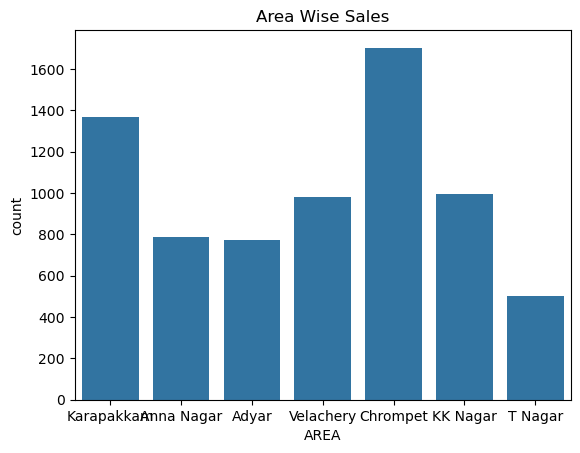

In [176]:
sns.countplot(data=df,x='AREA')
plt.title('Area Wise Sales')

OBSERVATIONS:
MOST NO.OF.SALES AREA WISE:
1. CHROMPET
2. KARAPAKKAM
3. KK NAGAR
4. VELACHERY
5. ANNA NAGAR
6. ADAYAR
7. T NAGAR

Text(0.5, 1.0, 'Sales Condition')

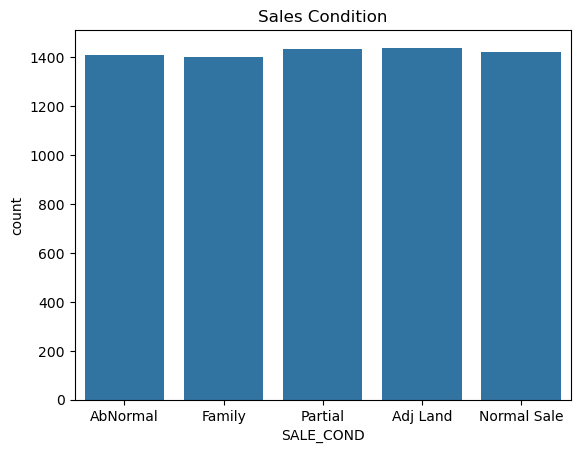

In [177]:
sns.countplot(data=df,x='SALE_COND')
plt.title('Sales Condition')

Text(0.5, 1.0, 'Parking Facility')

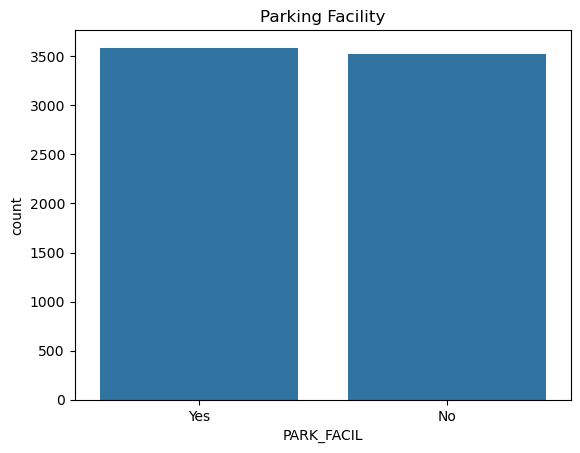

In [178]:
sns.countplot(data=df,x='PARK_FACIL')
plt.title('Parking Facility')

Text(0.5, 1.0, 'Type of Building')

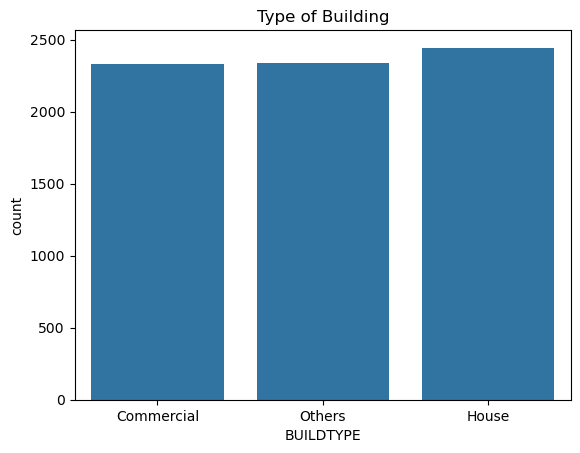

In [179]:
sns.countplot(data=df,x='BUILDTYPE')
plt.title('Type of Building')

Text(0.5, 1.0, 'Utility Available')

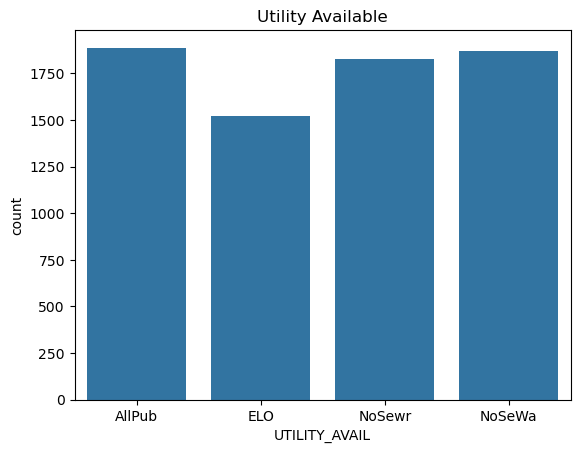

In [180]:
sns.countplot(data=df,x='UTILITY_AVAIL')
plt.title('Utility Available')

Text(0.5, 1.0, 'Street Type')

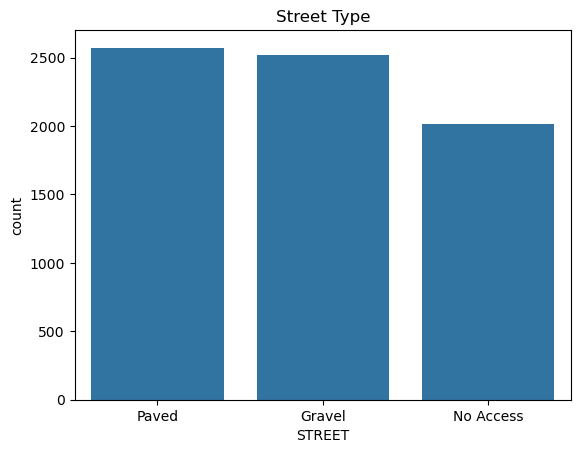

In [181]:
sns.countplot(data=df,x='STREET')
plt.title('Street Type')

Text(0.5, 1.0, 'Zones of Chennai')

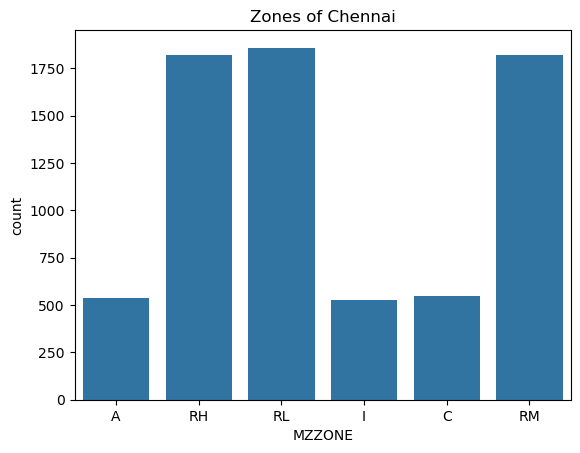

In [182]:
sns.countplot(data=df,x='MZZONE')
plt.title('Zones of Chennai')

Text(0.5, 1.0, 'No of Bedrooms')

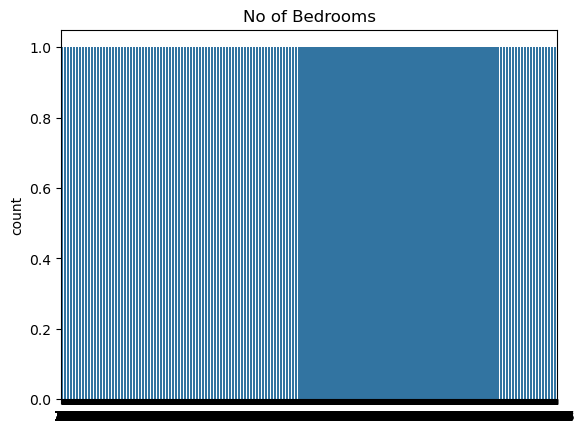

In [183]:
sns.countplot(df['N_BEDROOM'])
plt.title('No of Bedrooms')

Single Bed Room Houses Got Sold More. As No.of Bedroom Increases Total No.of Houses Sold Decreases

Text(0.5, 1.0, 'N_BATHROOM')

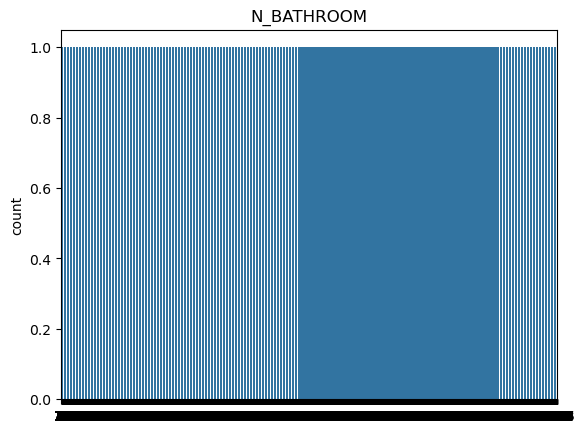

In [184]:
sns.countplot(df['N_BATHROOM'])
plt.title('N_BATHROOM')

**CONTINOUS DATA FEATURES**

<Axes: >

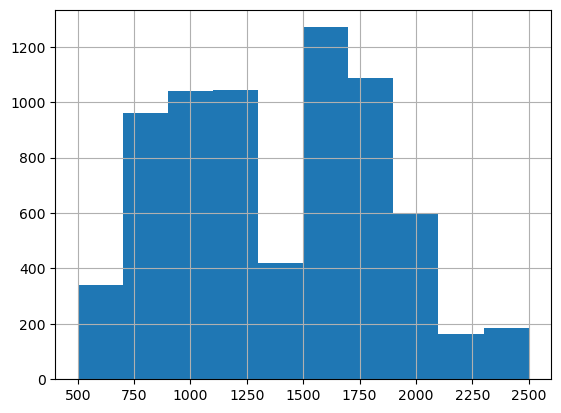

In [185]:
df.INT_SQFT.hist()

Text(0.5, 1.0, 'Area in Squarefeet')

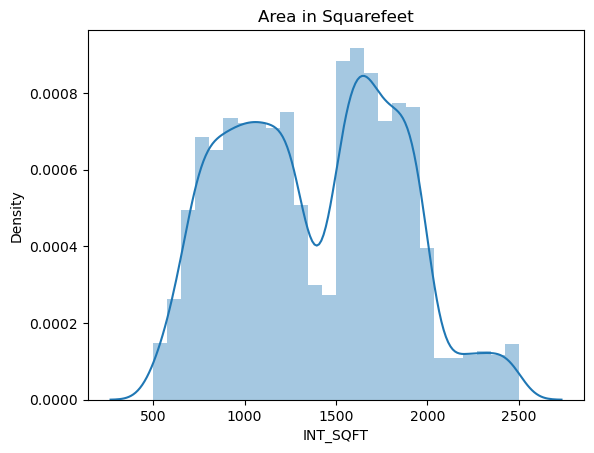

In [188]:
sns.distplot(df['INT_SQFT'])
plt.title('Area in Squarefeet')

**OBSERVATIONS:**
1. DOES NOT FOLLOW THE NORMAL DISTRIBUTION
2. NOT EFFECTIVELY SKEWED

<Axes: >

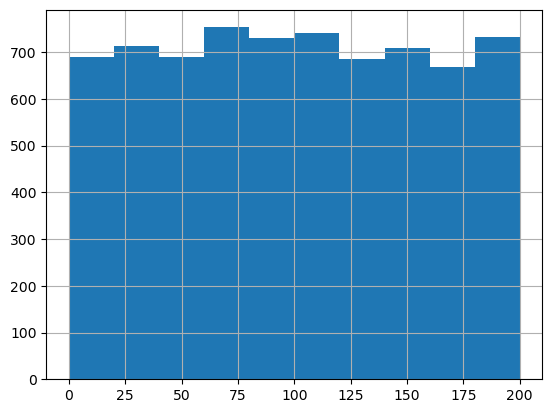

In [189]:
df.DIST_MAINROAD.hist()

Text(0.5, 1.0, 'Distance from Mainroad(in meters)')

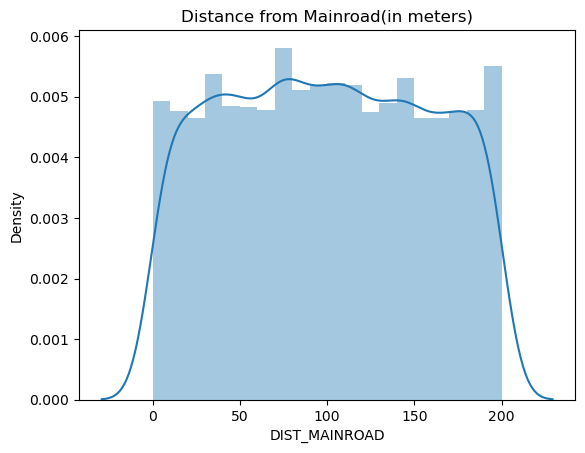

In [190]:
sns.distplot(df['DIST_MAINROAD'])
plt.title('Distance from Mainroad(in meters)')

**OBSERVATIONS:**
FOLLOWS UNIFORM DISTRIBUTION
NO SKEW

Text(0.5, 1.0, 'SALES PRICE')

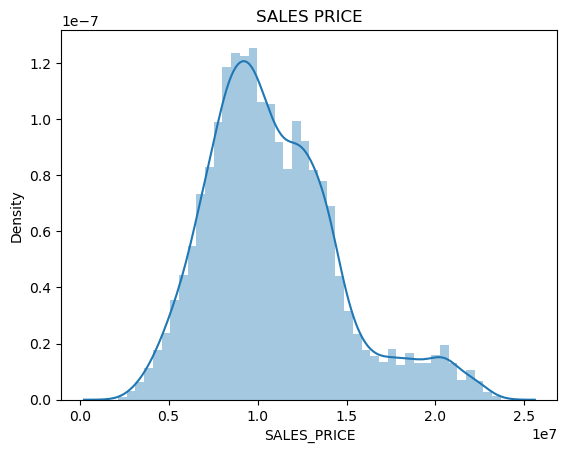

In [191]:
sns.distplot(df['SALES_PRICE'])
plt.title('SALES PRICE')

**OBSERVATIONS:**
1.Likely to follow Normal Distribution
2.Right Skewed

**CONTINOUS DATA FEATURE VS TARGET('SALES_PRICE')**

Text(0.5, 1.0, 'AGE_OF_BUILDING vs SALES_PRICE')

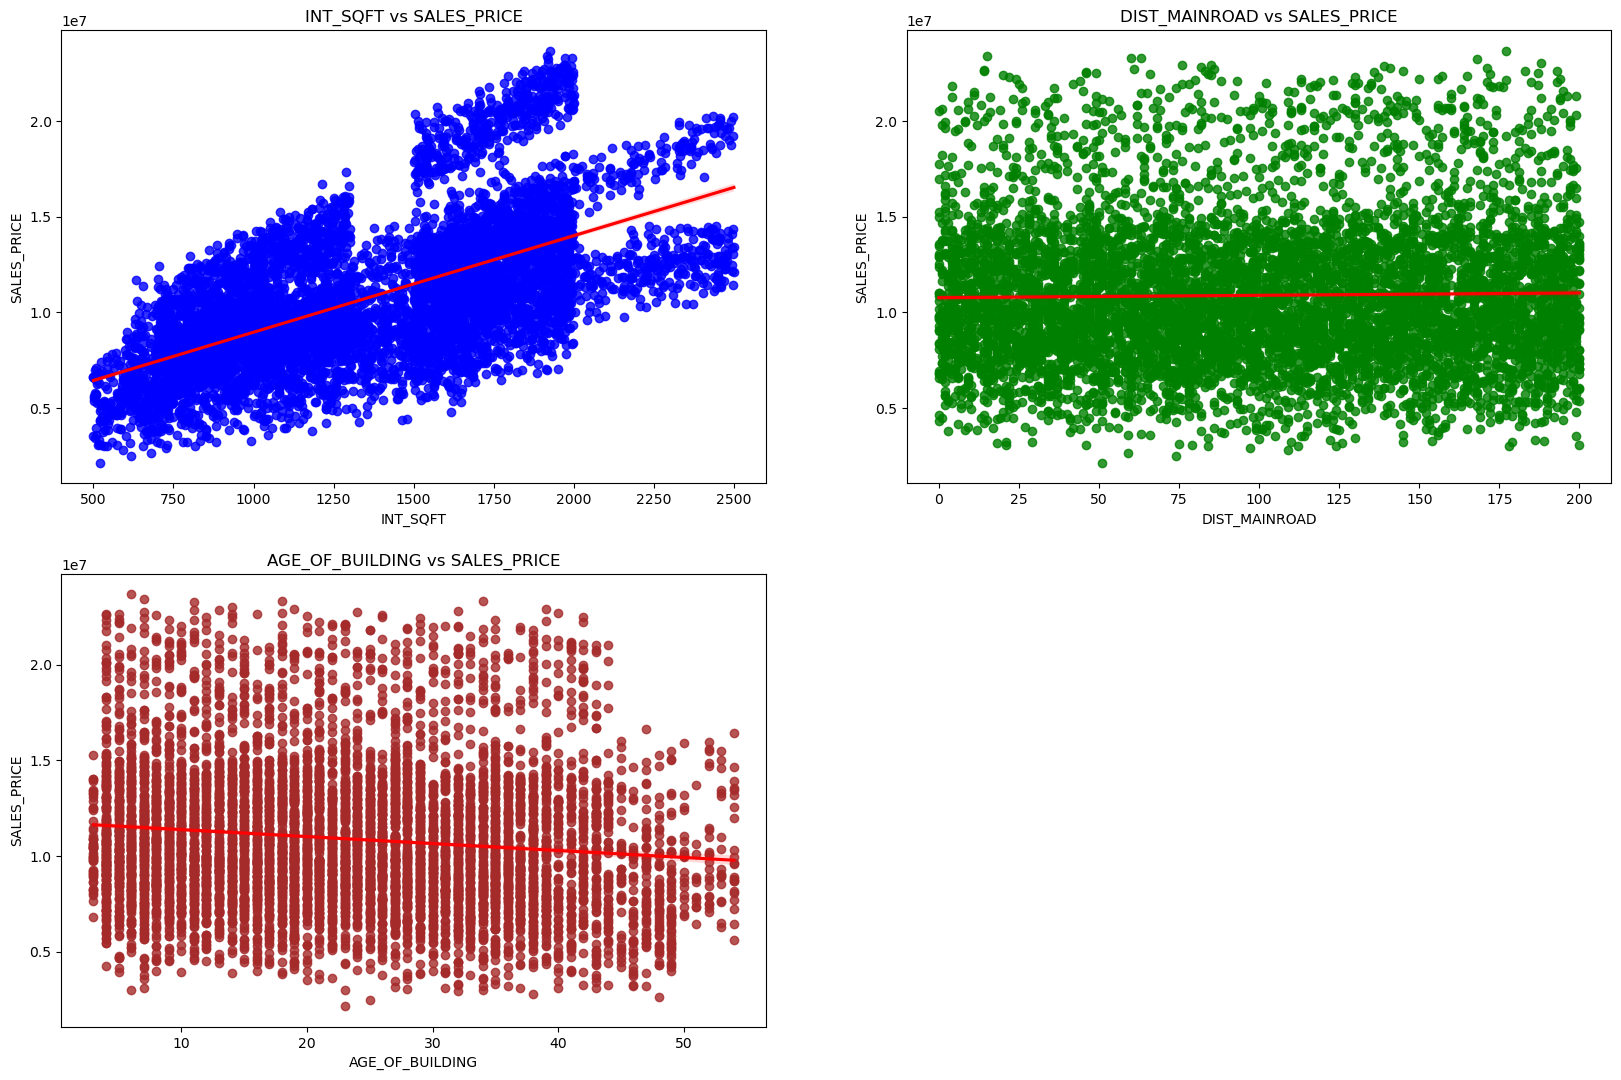

In [192]:
plt.figure(figsize=(20,20))
plt.subplot(321)
sns.regplot(x = df["INT_SQFT"], y =df["SALES_PRICE"], scatter_kws={"color" : "blue"}, line_kws={"color":"red"})
plt.title("INT_SQFT vs SALES_PRICE")

plt.subplot(322)
sns.regplot(x = df["DIST_MAINROAD"], y =df["SALES_PRICE"], scatter_kws={"color" : "green"}, line_kws={"color":"red"})
plt.title("DIST_MAINROAD vs SALES_PRICE")

plt.subplot(323)
sns.regplot(x = df["AGE_OF_BUILDING"], y =df["SALES_PRICE"], scatter_kws={"color" : "brown"}, line_kws={"color":"red"})
plt.title("AGE_OF_BUILDING vs SALES_PRICE")

**OBSERVATIONS:**
As INT SQFT increases, TOTAL SALE PRICE also increses.
The distance from the main road has no impact on the TOTAL SALE PRICE.
Age of the building has a slight effect on the total sale price. As age increses sales price decreses.

**CATEGORICAL DATA FEATURE VS TARGET('SALES_PRICE')**

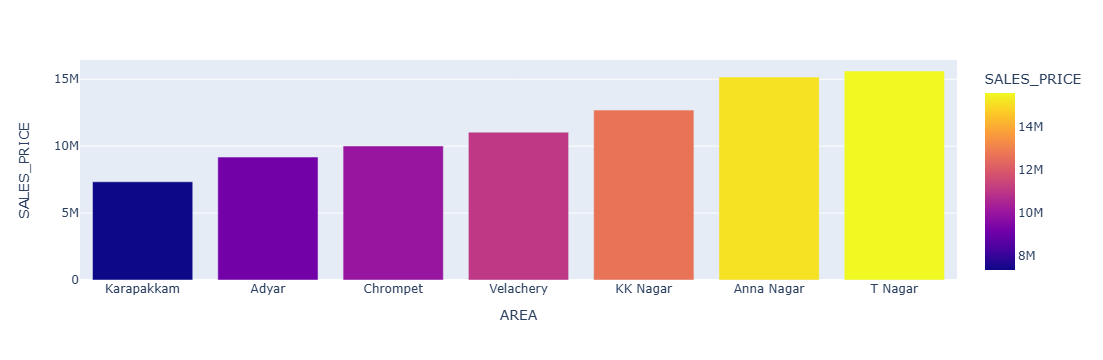

In [194]:
temp =pd.DataFrame(df.groupby('AREA')['SALES_PRICE'].mean())
temp = temp.sort_values(by='SALES_PRICE')
temp['AREA']=temp.index
AREA_values = temp.AREA.unique()
px.bar(temp,x='AREA',y='SALES_PRICE',color='SALES_PRICE')

Text(0.5, 1.0, 'AREA vs SALES_PRICE')

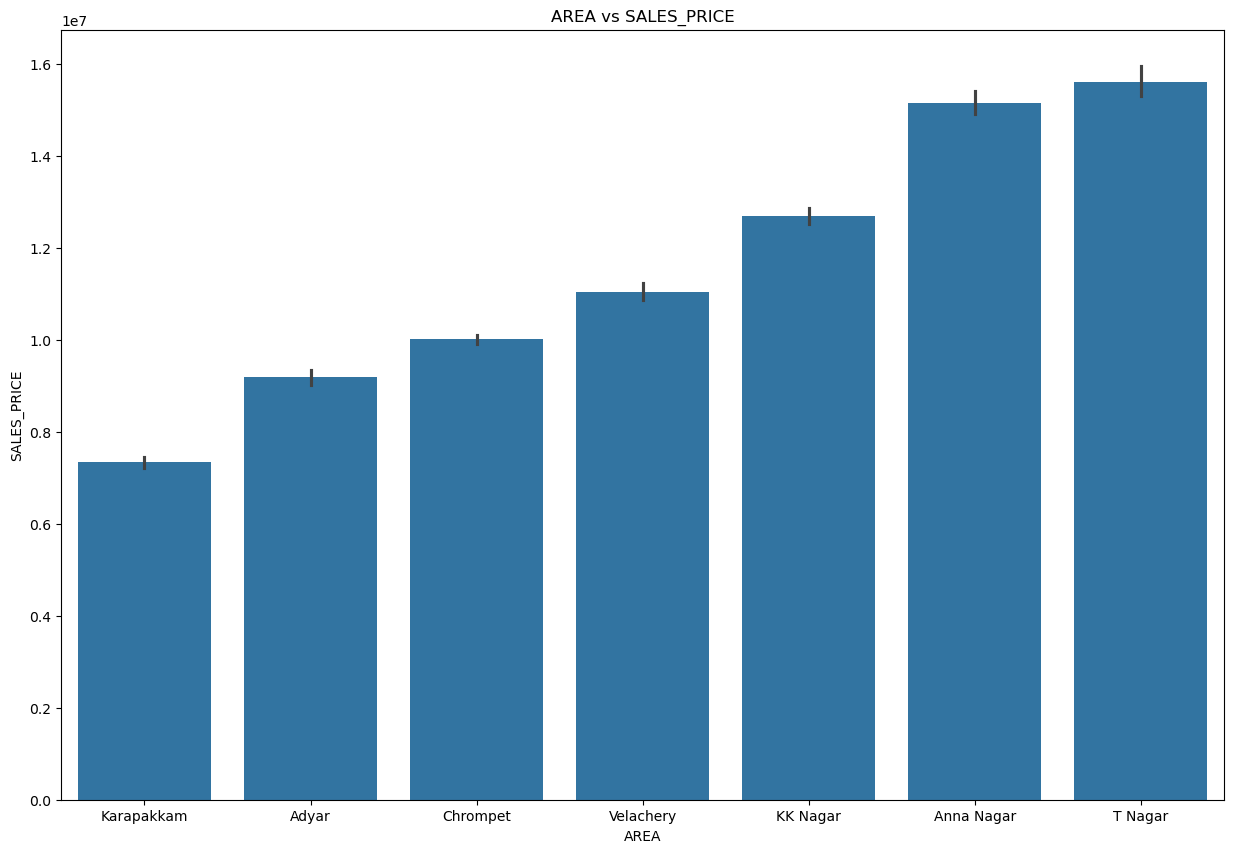

In [195]:
plt.figure(figsize=(15,10))
sns.barplot(x=df.AREA,y=df.SALES_PRICE,order=df.groupby('AREA')['SALES_PRICE'].mean().reset_index().sort_values('SALES_PRICE')['AREA'])
plt.title('AREA vs SALES_PRICE')

From the above plot it is evident that there is a linear relationship between the Area and Target

Text(0.5, 1.0, 'SALE_COND vs SALES_PRICE')

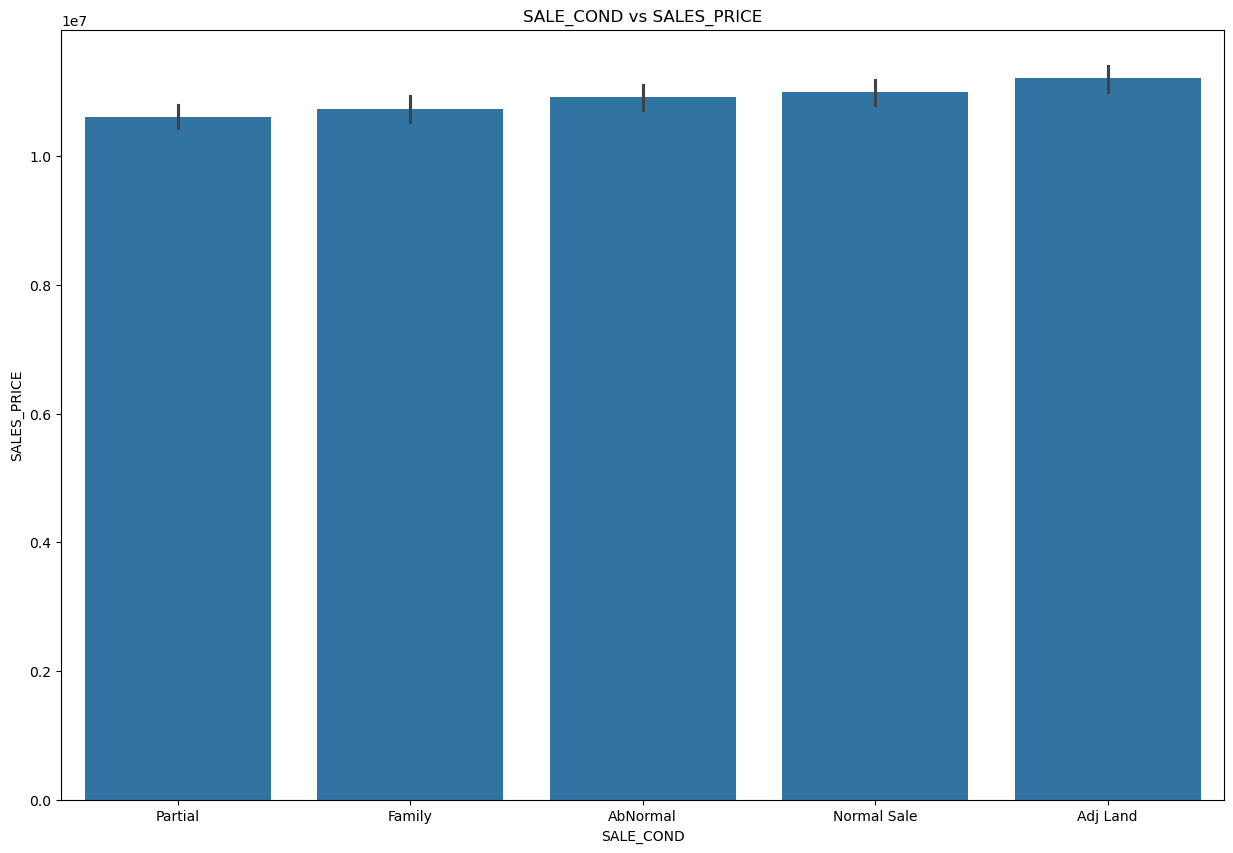

In [196]:
plt.figure(figsize=(15,10))
sns.barplot(x=df.SALE_COND,y=df.SALES_PRICE,order=df.groupby('SALE_COND')['SALES_PRICE'].mean().reset_index().sort_values('SALES_PRICE')['SALE_COND'])
plt.title('SALE_COND vs SALES_PRICE')

There is slight linear relationship between the feature and target

Text(0.5, 1.0, 'N_BEDROOM vs SALES_PRICE')

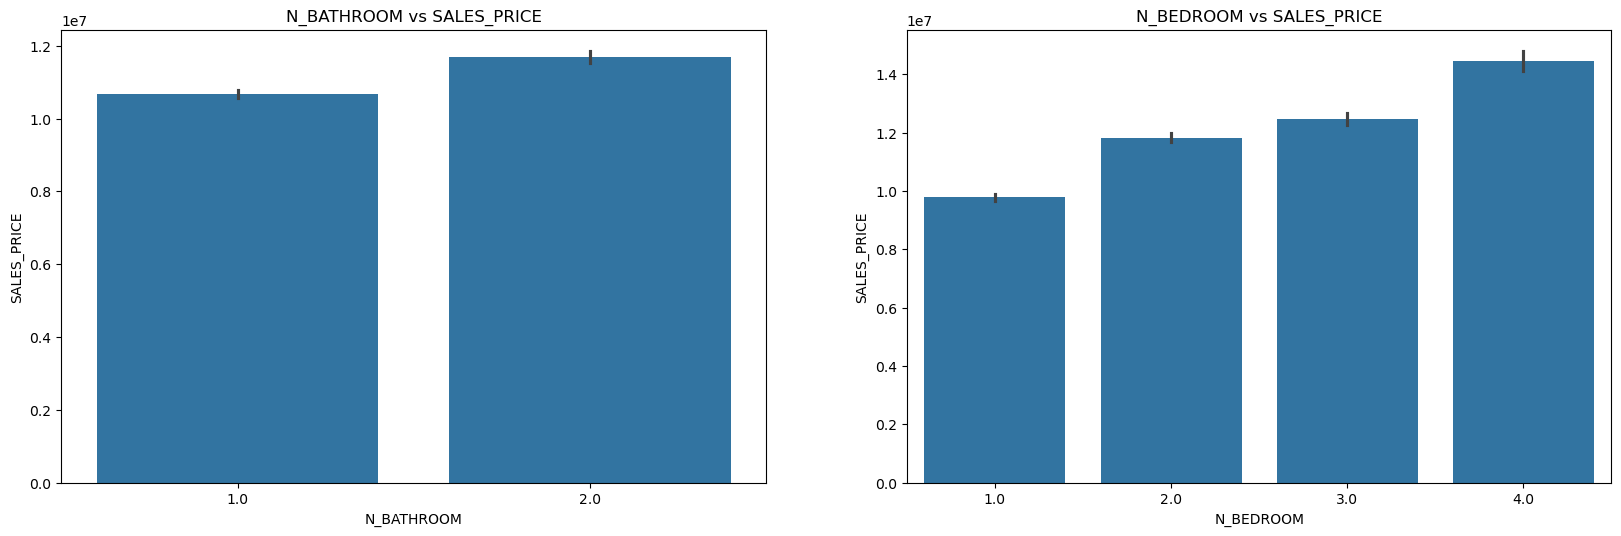

In [197]:
plt.figure(figsize=(20,20))
plt.subplot(321)
sns.barplot(x=df.N_BATHROOM,y=df.SALES_PRICE,order=df.groupby('N_BATHROOM')['SALES_PRICE'].mean().reset_index().sort_values('SALES_PRICE')['N_BATHROOM'])
plt.title('N_BATHROOM vs SALES_PRICE')

plt.subplot(322)
sns.barplot(x=df.N_BEDROOM,y=df.SALES_PRICE,order=df.groupby('N_BEDROOM')['SALES_PRICE'].mean().reset_index().sort_values('SALES_PRICE')['N_BEDROOM'])
plt.title('N_BEDROOM vs SALES_PRICE')

From the above plot it is evident that there is a linear relationship between the N_BEDROOM,N_BATHROOM and Target

Text(0.5, 1.0, 'PARK_FACIL vs SALES_PRICE')

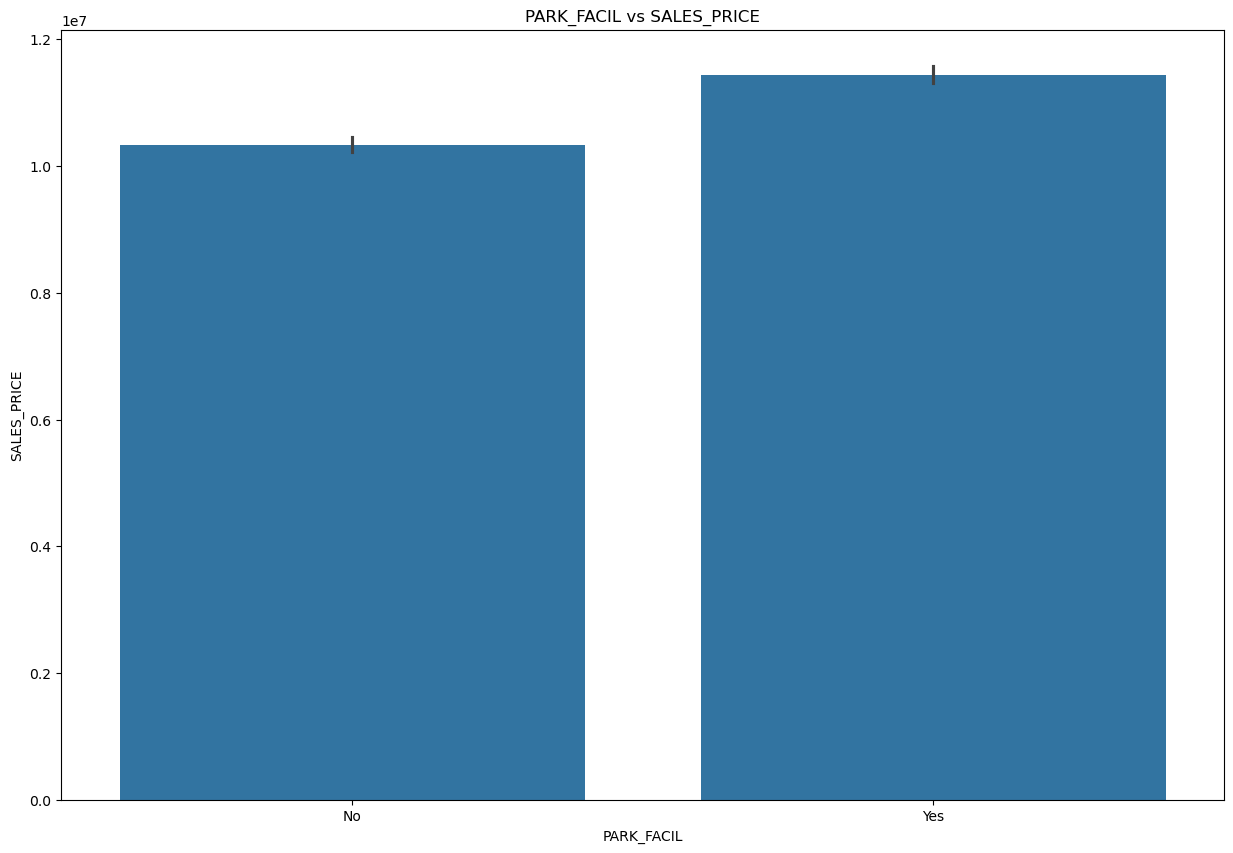

In [198]:
plt.figure(figsize=(15,10))
sns.barplot(x=df.PARK_FACIL,y=df.SALES_PRICE,order=df.groupby('PARK_FACIL')['SALES_PRICE'].mean().reset_index().sort_values('SALES_PRICE')['PARK_FACIL'])
plt.title('PARK_FACIL vs SALES_PRICE')

From the above plot, it is clear that, houses with parking facility sold for higher prices

Text(0.5, 1.0, 'BUILDTYPE vs SALES_PRICE')

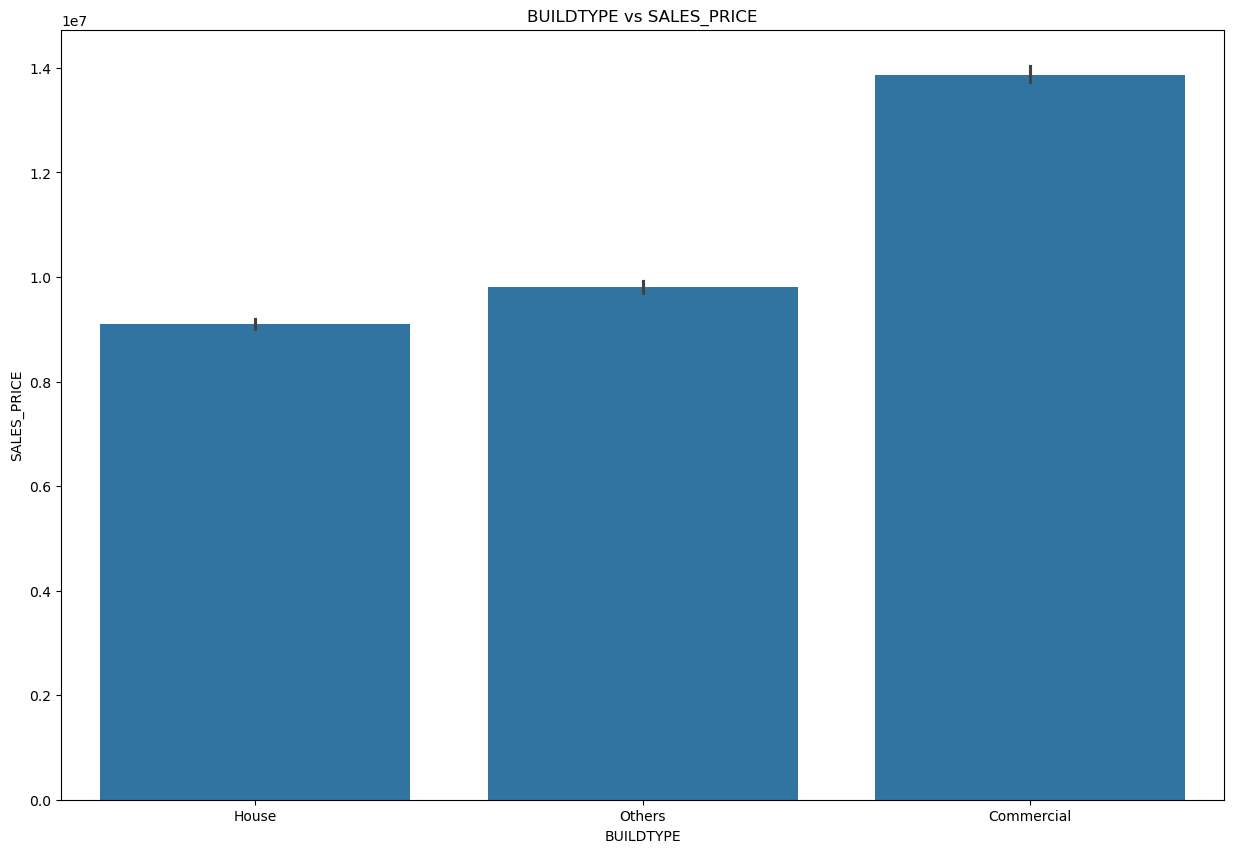

In [199]:
plt.figure(figsize=(15,10))
sns.barplot(x=df.BUILDTYPE,y=df.SALES_PRICE, order=df.groupby('BUILDTYPE')['SALES_PRICE'].mean().reset_index().sort_values('SALES_PRICE')['BUILDTYPE'])
plt.title('BUILDTYPE vs SALES_PRICE')

There is no linear relationship between this feature and target

Text(0.5, 1.0, 'STREET vs SALES_PRICE')

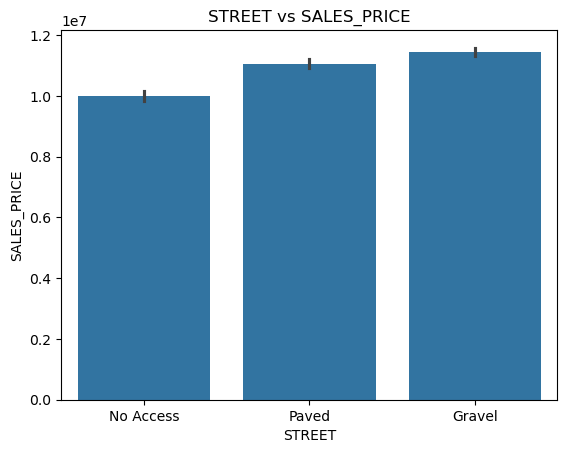

In [200]:
sns.barplot(x=df.STREET,y=df.SALES_PRICE,order=df.groupby('STREET')['SALES_PRICE'].mean().reset_index().sort_values('SALES_PRICE')['STREET'])
plt.title('STREET vs SALES_PRICE')

There is linear relationship between the feature and target

Text(0.5, 1.0, 'MZZONE vs SALES_PRICE')

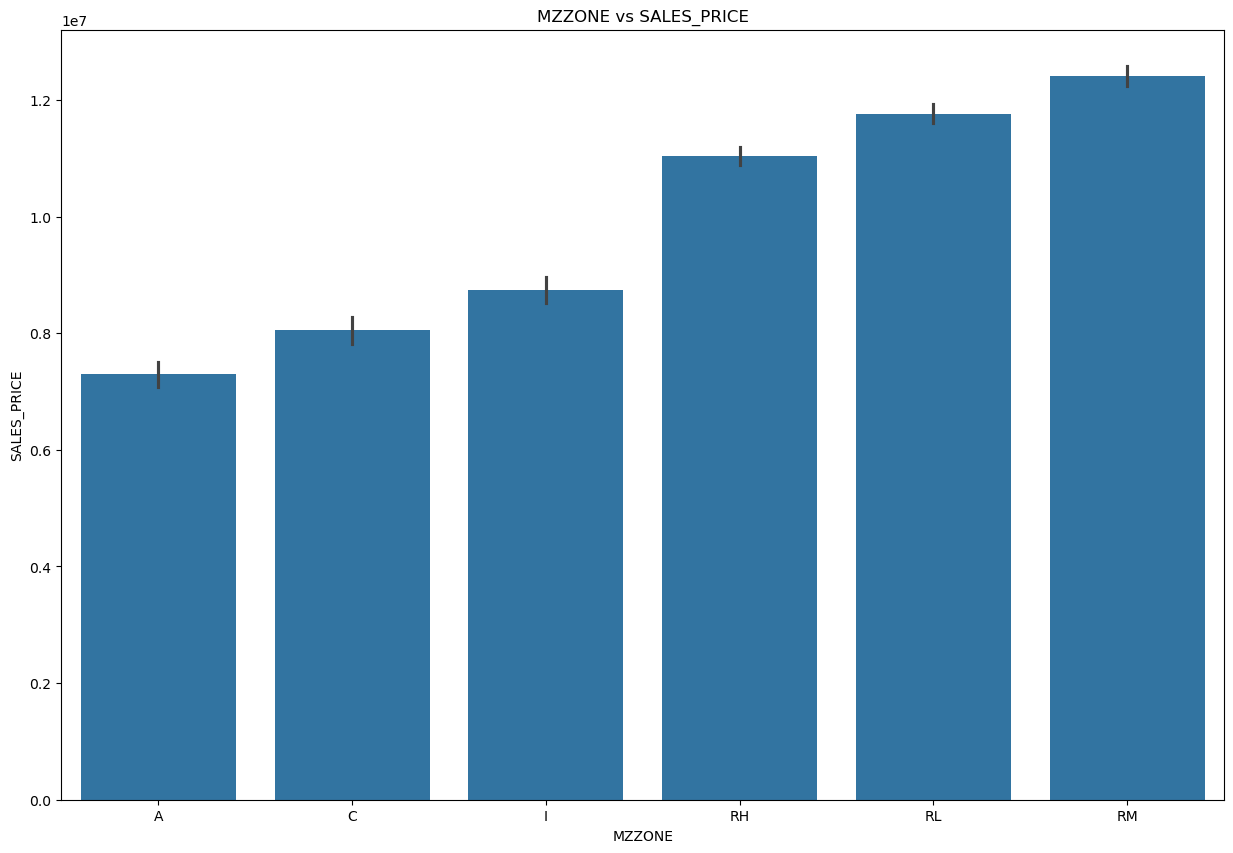

In [201]:
plt.figure(figsize=(15,10))
sns.barplot(x=df.MZZONE,y=df.SALES_PRICE,order=df.groupby('MZZONE')['SALES_PRICE'].mean().reset_index().sort_values('SALES_PRICE')['MZZONE'])
plt.title('MZZONE vs SALES_PRICE')

There is linear relationship between the feature and target

Text(0.5, 1.0, 'N_ROOM vs SALES_PRICE')

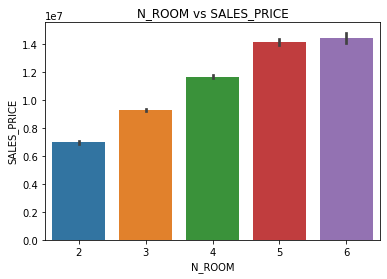

In [91]:
sns.barplot(x=df.N_ROOM,y=df.SALES_PRICE,order=df.groupby('N_ROOM')['SALES_PRICE'].mean().reset_index().sort_values('SALES_PRICE')['N_ROOM'])
plt.title('N_ROOM vs SALES_PRICE')

There is linear relationship between the feature and target

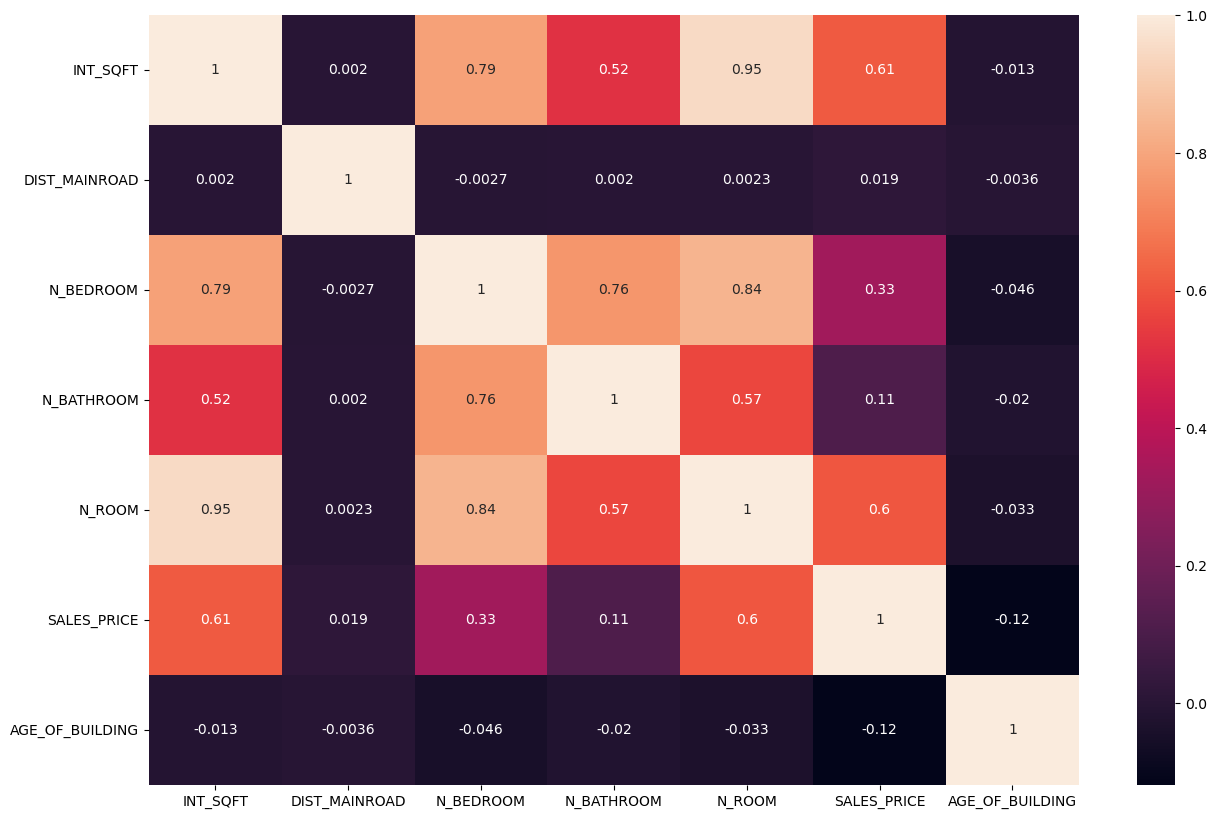

In [202]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(numeric_only=True), annot=True)
plt.show()

**OVERALL OBSERVATIONS:**             
1.There is a linear relationship between Area, MZ Zone, N ROOM, N BEDROOM, N BATHROOM, STREET,SALE COND and TOTAL SALE PRICE.             
2.For AREA, STREET, MZ ZONE, and SALE COND, we apply ordinal label encoding.                              
3.Although there is no linear relationship, BUILDTYPE does impact SALE PRICE. Therefore, for this column, we choose one hot encoding.     
4.There is a linear relationship between UTILITY AVAIL and STREET and TOTAL SALE PRICE. but, having less of an impact than other features.

# **ENCODING**

**ORDINAL LABEL ENCODING:**

For AREA, SALE COND,UTILITY_AVAIL,STREET AND MZ ZONE, we apply ordinal label encoding.

In [293]:
df

AREA  INT_SQFT  DIST_MAINROAD  N_BEDROOM  N_BATHROOM  N_ROOM  \
0     Karapakkam      1004            131          1           1       3   
1     Anna Nagar      1986             26          2           1       5   
2          Adyar       909             70          1           1       3   
3      Velachery      1855             14          3           2       5   
4     Karapakkam      1226             84          1           1       3   
...          ...       ...            ...        ...         ...     ...   
7104  Karapakkam       598             51          1           1       2   
7105   Velachery      1897             52          3           2       5   
7106   Velachery      1614            152          2           1       4   
7107  Karapakkam       787             40          1           1       2   
7108   Velachery      1896            156          3           2       5   

        SALE_COND PARK_FACIL   BUILDTYPE UTILITY_AVAIL     STREET MZZONE  \
0        AbNormal        Yes  Commercial        AllPub      Paved      A   
1        AbNormal         No  Commercial        AllPub     Gravel     RH   
2        AbNormal        Yes  Commercial           ELO     Gravel     RL   
3          Family         No      Others        NoSewr      Paved      I   
4        AbNormal        Yes      Others        AllPub     Gravel      C   
...           ...        ...         ...           ...        ...    ...   
7104     Adj Land         No      Others           ELO  No Access     RM   
7105       Family        Yes      Others        NoSeWa  No Access     RH   
7106  Normal Sale         No       House        NoSeWa     Gravel      I   
7107      Partial        Yes  Commercial           ELO      Paved     RL   
7108      Partial        Yes      Others           ELO      Paved      I   

      SALES_PRICE  AGE_OF_BUILDING  
0         7600000               43  
1        21717770               10  
2        13159200               19  
3         9630290               21  
4         7406250               29  
...           ...              ...  
7104      5353000               48  
7105     10818480                8  
7106      8351410               27  
7107      8507000               31  
7108      9976480               43  

[7109 rows x 14 columns]

In [297]:
df["AREA"] = df["AREA"].replace({"Karapakkam": 0,"Adyar": 1, "T Nagar": 6, "Chrompet": 2, "Velachery": 3, "Anna Nagar" : 5,"KK Nagar" : 4})

df["SALE_COND"] = df["SALE_COND"].replace({"Partial": 0,"Family": 1,"AbNormal": 2, "Normal Sale": 3,"Adj Land" : 4})

df["UTILITY_AVAIL"] = df["UTILITY_AVAIL"].replace({"ELO": 0, "NoSeWa": 1, "NoSewr" : 2, "AllPub": 3})

df["STREET"] = df["STREET"].replace({"No Access": 0,"Paved": 1, "Gravel": 2})

df["MZZONE"] = df["MZZONE"].replace({"A": 0,"C": 1, "I": 2, "RH": 3, "RL": 4, "RM" : 5})
# Label Encoding (Binary Categorical Feature)
df["PARK_FACIL"] = df["PARK_FACIL"].replace({"No": 0, "Yes": 1})

In [298]:
df

AREA  INT_SQFT  DIST_MAINROAD  N_BEDROOM  N_BATHROOM  N_ROOM  SALE_COND  \
0        0      1004            131          1           1       3          2   
1        5      1986             26          2           1       5          2   
2        1       909             70          1           1       3          2   
3        3      1855             14          3           2       5          1   
4        0      1226             84          1           1       3          2   
...    ...       ...            ...        ...         ...     ...        ...   
7104     0       598             51          1           1       2          4   
7105     3      1897             52          3           2       5          1   
7106     3      1614            152          2           1       4          3   
7107     0       787             40          1           1       2          0   
7108     3      1896            156          3           2       5          0   

      PARK_FACIL   BUILDTYPE  UTILITY_AVAIL  STREET  MZZONE  SALES_PRICE  \
0              1  Commercial              3       1       0      7600000   
1              0  Commercial              3       2       3     21717770   
2              1  Commercial              0       2       4     13159200   
3              0      Others              2       1       2      9630290   
4              1      Others              3       2       1      7406250   
...          ...         ...            ...     ...     ...          ...   
7104           0      Others              0       0       5      5353000   
7105           1      Others              1       0       3     10818480   
7106           0       House              1       2       2      8351410   
7107           1  Commercial              0       1       4      8507000   
7108           1      Others              0       1       2      9976480   

      AGE_OF_BUILDING  
0                  43  
1                  10  
2                  19  
3                  21  
4                  29  
...               ...  
7104               48  
7105                8  
7106               27  
7107               31  
7108               43  

[7109 rows x 14 columns]

**One Hot Encoding**

In [299]:
df["BUILDTYPE"] = df["BUILDTYPE"].replace({"House": 0, "Others": 1,"Commercial": 2})
df

AREA  INT_SQFT  DIST_MAINROAD  N_BEDROOM  N_BATHROOM  N_ROOM  SALE_COND  \
0        0      1004            131          1           1       3          2   
1        5      1986             26          2           1       5          2   
2        1       909             70          1           1       3          2   
3        3      1855             14          3           2       5          1   
4        0      1226             84          1           1       3          2   
...    ...       ...            ...        ...         ...     ...        ...   
7104     0       598             51          1           1       2          4   
7105     3      1897             52          3           2       5          1   
7106     3      1614            152          2           1       4          3   
7107     0       787             40          1           1       2          0   
7108     3      1896            156          3           2       5          0   

      PARK_FACIL  BUILDTYPE  UTILITY_AVAIL  STREET  MZZONE  SALES_PRICE  \
0              1          2              3       1       0      7600000   
1              0          2              3       2       3     21717770   
2              1          2              0       2       4     13159200   
3              0          1              2       1       2      9630290   
4              1          1              3       2       1      7406250   
...          ...        ...            ...     ...     ...          ...   
7104           0          1              0       0       5      5353000   
7105           1          1              1       0       3     10818480   
7106           0          0              1       2       2      8351410   
7107           1          2              0       1       4      8507000   
7108           1          1              0       1       2      9976480   

      AGE_OF_BUILDING  
0                  43  
1                  10  
2                  19  
3                  21  
4                  29  
...               ...  
7104               48  
7105                8  
7106               27  
7107               31  
7108               43  

[7109 rows x 14 columns]

In [300]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7109 entries, 0 to 7108
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   AREA             7109 non-null   int64
 1   INT_SQFT         7109 non-null   int64
 2   DIST_MAINROAD    7109 non-null   int64
 3   N_BEDROOM        7109 non-null   int32
 4   N_BATHROOM       7109 non-null   int32
 5   N_ROOM           7109 non-null   int64
 6   SALE_COND        7109 non-null   int64
 7   PARK_FACIL       7109 non-null   int64
 8   BUILDTYPE        7109 non-null   int64
 9   UTILITY_AVAIL    7109 non-null   int64
 10  STREET           7109 non-null   int64
 11  MZZONE           7109 non-null   int64
 12  SALES_PRICE      7109 non-null   int64
 13  AGE_OF_BUILDING  7109 non-null   int32
dtypes: int32(3), int64(11)
memory usage: 694.4 KB


**Now that we have all the data we 
need, we can start applying the machine learning models.**

**SPLITTING THE DATASET**

In [301]:
from sklearn.model_selection import train_test_split
X=df.drop(['SALES_PRICE'],axis=1)
Y=df['SALES_PRICE']

In [302]:
X.shape

(7109, 13)

In [303]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.2, random_state=5)

In [304]:
x_train.shape

(5687, 13)

In [305]:
x_test.shape

(1422, 13)

#**Machine Learning Models**

**1.Linear Regression**

In [306]:
# Scaling the test and train data

from sklearn.preprocessing import StandardScaler # importing the required function
scaler = StandardScaler() #initialis
scaler.fit(x_train) # find the values of mu and sigma
X_train = scaler.transform(x_train)
X_test = scaler.transform(x_test)

In [307]:
 #importing all the required functions
from sklearn.linear_model import LinearRegression

In [308]:
#Building the Model
lr=LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

In [309]:
#FINAL PREDICTIONS:
y_pred = lr.predict(x_test)
y_pred

array([10564469.85536139, 15464364.75010055, 14101766.51406796, ...,
        6077136.82982114,  8171256.53243118, 16630577.35290113])

In [310]:
#RESULTS---ACTUAL VS PREDICTED
result = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
result

Actual     Predicted
6107   9866820  1.056447e+07
6964  14238410  1.546436e+07
6580  13547020  1.410177e+07
1036  14048900  1.373491e+07
1469   7439700  5.809744e+06
...        ...           ...
6279  12181500  1.152677e+07
6190  13491940  1.499995e+07
1828   6408750  6.077137e+06
5125   9387600  8.171257e+06
4277  14844980  1.663058e+07

[1422 rows x 2 columns]

In [311]:
#EVALUVATING THE MODEL:
from sklearn import metrics
lr1 = metrics.r2_score(y_test,y_pred)
print('R2- SCORE FOR LINEAR REGRESSION:', round((lr1*100),2),"%")

R2- SCORE FOR LINEAR REGRESSION: 88.89 %


In [314]:
#pickling the best model
import pickle
with open('linear_model_pkl','wb') as model:
  pickle.dump(lr,model)

#**Deploying the Model**

In [153]:
!pip install streamlit -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.3/9.3 MB 24.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 238.4/238.4 KB 20.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.0/79.0 KB 8.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 184.0/184.0 KB 17.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 164.8/164.8 KB 18.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 77.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 KB 7.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 51.1/51.1 KB 4.9 MB/s eta 0:00:00


In [156]:
%%writefile app.py
import pickle
import pandas as pd
import streamlit as st
from babel.numbers import format_currency
from PIL import Image
data=pd.read_csv("final_data_guvi_app")
model = pickle.load(open('xg_model_pkl','rb'))
def main():
    # Create a page dropdown
    image = Image.open('house app.jpg')
    st.sidebar.image(image,width=100)
    st.sidebar.title("Guvi_Homes")
    col1, col2 = st.columns( [0.5, 0.5])
    with col1:
        st.title("Guvi_Homes")   
    with col2:
        st.image(image,  width=150)
    page = st.sidebar.selectbox("Select One", ['ABOUT',"PRICE PREDICTION"])
    if page == "ABOUT":
        st.title('Welcome to Guvi_Homes')
        st.subheader('Guvi Homes is a website where you can look at sales data for Chennai and project the price range of your dream house.')
        st.write('Creator Profile:')
        st.write('**Creator:** Venkatesh S')
        st.write('**Mail Id:** Venkateshraj1996s@gmail.com')
        st.write("**Linked In:** https://www.linkedin.com/in/venkateshsellamuthu/")

    if page == "PRICE PREDICTION":
        st.title('PRICE PREDICTION')
        AREA = st.selectbox("Select an Area ",data.AREA.unique())
        if AREA == 'Chrompet':
            grouped=data[data['AREA']=='Chrompet']
            AREA = 2
        elif AREA == 'Karapakkam':
            grouped=data[data['AREA']=='Karapakkam']
            AREA  = 4
        elif AREA == 'KK Nagar':
            grouped=data[data['AREA']=='KK Nagar']
            AREA = 3
        elif AREA == 'Anna Nagar':
            grouped=data[data['AREA']=='Anna Nagar']
            AREA = 1
        elif AREA == 'Adyar':
            grouped=data[data['AREA']=='Adyar']
            AREA = 0
        elif AREA == 'T Nagar':
            grouped=data[data['AREA']=='T Nagar']
            AREA = 5
        elif AREA == 'Velachery':
            grouped=data[data['AREA']=='Velachery']
            AREA = 6

        INT_SQFT = st.slider("SQFT Required",int(data.INT_SQFT.min()),int(data.INT_SQFT.max()))

        DIST_MAINROAD = st.slider("DIST_MAINROAD",int(data.DIST_MAINROAD.min()),int(data.DIST_MAINROAD.max()))
        
        N_BEDROOM = st.slider("No of Bedrooms",int(data.N_BEDROOM.min()),int(data.N_BEDROOM.max()))

        N_BATHROOM = st.slider("No of Bathrooms",int(data.N_BATHROOM.min()),int(data.N_BATHROOM.max()))

        N_ROOM = st.slider("Total no of rooms",int(data.N_ROOM.min()),int(data.N_ROOM.max()))

        #Coverting SALE_COND categorical to numerical
        SALE_COND = st.selectbox("SALE_COND Preference",grouped.SALE_COND.unique())
        if SALE_COND == 'Partial':
            SALE_COND = 0
        elif SALE_COND == 'Family':
            SALE_COND = 1
        elif SALE_COND == 'AbNormal':
            SALE_COND = 2
        elif SALE_COND == 'Normal Sale':
            SALE_COND = 3
        else:
            SALE_COND = 4

        PARK_FACIL = st.radio("Parking Area",data.PARK_FACIL.unique())
        if PARK_FACIL == 'Yes':
            PARK_FACIL = 1
        else:
            PARK_FACIL = 0
        
        #Coverting UTILITY_AVAIL categorical to numerical
        UTILITY_AVAIL = st.selectbox("UTILITY_AVAILBLITY Preference",grouped.UTILITY_AVAIL.unique())
        if UTILITY_AVAIL == 'ELO':
            UTILITY_AVAIL = 0
        elif UTILITY_AVAIL == 'NoSeWa':
            UTILITY_AVAIL = 1
        elif UTILITY_AVAIL == 'NoSewr':
            UTILITY_AVAIL = 2
        else:
            UTILITY_AVAIL = 3

        STREET = st.selectbox("Access TO THE Building",data.STREET.unique())

        if STREET == 'Gravel':
            STREET = 0
        elif STREET == 'Paved':
            STREET = 2
        else:
            STREET = 1

        #Coverting MZZONe categorical to numerical
        MZZONE = st.selectbox("Chennai Zone Preference",grouped.MZZONE.unique())
        if MZZONE == 'A':
            MZZONE = 0
        elif MZZONE == 'RH':
            MZZONE = 3
        elif MZZONE == 'RL':
            MZZONE = 4
        elif MZZONE == 'I':
            MZZONE = 2
        elif MZZONE == 'C':
            MZZONE = 1
        else:
            MZZONE = 5
        

        AGE_OF_BUILDING = st.slider("AGE_OF_BUILDING",int(data.AGE_OF_BUILDING.min()),int(data.AGE_OF_BUILDING.max()))


        BUILDTYPE_Commercial = st.radio("BUILDTYPE_Commercial",data.BUILDTYPE_Commercial.unique())
        if BUILDTYPE_Commercial == 'Yes':
            BUILDTYPE_Commercial = 1
        else:
            BUILDTYPE_Commercial = 0
        
        BUILDTYPE_House = st.radio("BUILDTYPE_House",data.BUILDTYPE_House.unique())
        if BUILDTYPE_House == 'Yes':
            BUILDTYPE_House = 1
        else:
            BUILDTYPE_House = 0
        
        BUILDTYPE_Others = st.radio("BUILDTYPE_Others",data.BUILDTYPE_Others.unique())
        if BUILDTYPE_Others == 'Yes':
            BUILDTYPE_Others = 1
        else:
            BUILDTYPE_Others = 0

        input = pd.DataFrame([[AREA,INT_SQFT,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,UTILITY_AVAIL,STREET,MZZONE,AGE_OF_BUILDING,BUILDTYPE_Commercial,BUILDTYPE_House,BUILDTYPE_Others]],columns=['AREA','INT_SQFT','DIST_MAINROAD','N_BEDROOM','N_BATHROOM','N_ROOM','SALE_COND','PARK_FACIL','UTILITY_AVAIL','STREET','MZZONE','AGE_OF_BUILDING','BUILDTYPE_Commercial','BUILDTYPE_House','BUILDTYPE_Others'],index=['index'])
                            
                            
        #st.dataframe(input)

        valu = model.predict(input)
        low=int(valu-(valu*0.02))
        low = format_currency(low, 'INR', locale='en_IN')


        high=int(valu+(valu*0.02))
        high = format_currency(high, 'INR', locale='en_IN')

        #print('Estimated value is:',low , 'to', high)


        if st.button(" Get Price",help="Click to predict the price"):
            st.markdown("<h1 style='text-align: center; color: Green;'>Predicted House Price Range</h1>", unsafe_allow_html=True)
            st.write(" ",  low , 'to', high   ," ")
            st.snow()

if __name__=='__main__':
    main()###

Writing app.py


In [ ]:
!streamlit run app.py & npx localtunnel --port 8501

[##................] - fetchMetadata: sill resolveWithNewModule ansi-styles@4.3


  You can now view your Streamlit app in your browser.

  Network URL: http://172.28.0.2:8501
  External URL: http://34.86.233.74:8501

npx: installed 22 in 4.593s
your url is: https://wide-streets-obey-34-86-233-74.loca.lt
2023-01-17 06:10:52.326 Uncaught app exception
Traceback (most recent call last):
  File "/usr/local/lib/python3.8/dist-packages/streamlit/runtime/scriptrunner/script_runner.py", line 565, in _run_script
    exec(code, module.__dict__)
  File "/content/app.py", line 6, in <module>
    data=pd.read_csv("final_data_guvi_app")
  File "/usr/local/lib/python3.8/dist-packages/pandas/util/_decorators.py", line 311, in wrapper
    return func(*args, **kwargs)
  File "/usr/local/lib/python3.8/dist-packages/pandas/io/parsers/readers.py", line 586, in read_csv
    return _read(filepath_or_buffer, kwds)
  File "/usr/local/lib/python3.8/dist-packages/pandas/io/parsers/readers.py", line 482, in _rea